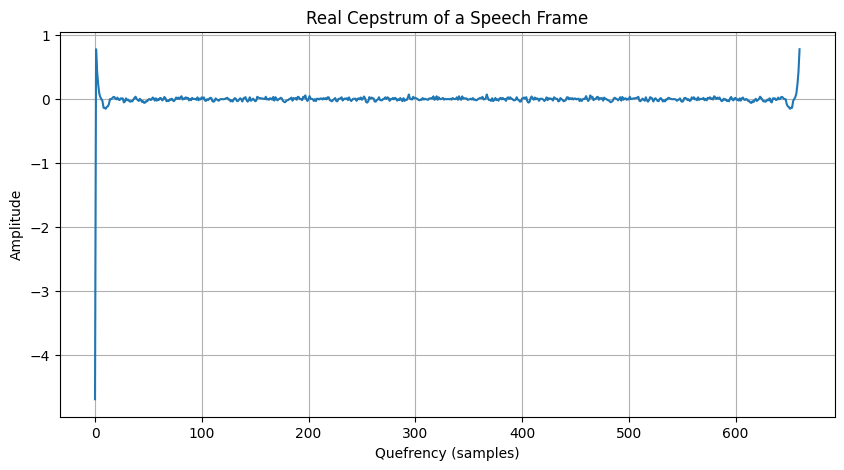

Estimated Pitch Period: 13.33 ms
Estimated Fundamental Frequency (F0): 75.00 Hz


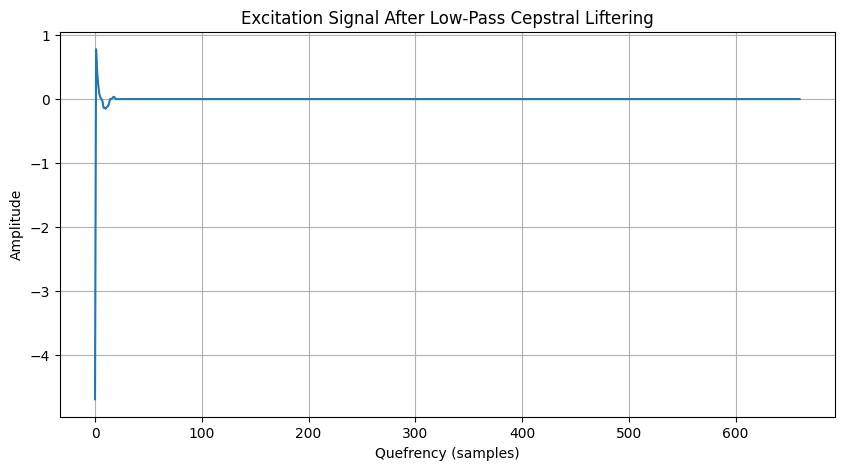


Observations:
1. The real cepstrum shows peaks corresponding to periodicity in speech.
2. The highest peak in the 5-20 ms range corresponds to the pitch period.
3. The estimated F0 falls within a reasonable range for human speech.
4. Cepstral liftering helps in separating the excitation source from the vocal tract response.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.signal import lfilter

y, sr = librosa.load('/content/LJ001-0004.wav', sr=None)

frame_size = int(0.03 * sr)
hop_size = int(0.01 * sr)
frame_start = sr
frame = y[frame_start:frame_start + frame_size]

spectrum = np.fft.fft(frame)
log_magnitude = np.log(np.abs(spectrum) + 1e-10)
cepstrum = np.fft.ifft(log_magnitude).real

plt.figure(figsize=(10, 5))
plt.plot(cepstrum)
plt.title("Real Cepstrum of a Speech Frame")
plt.xlabel("Quefrency (samples)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

min_quef = int(0.005 * sr)
max_quef = int(0.02 * sr)
pitch_range = cepstrum[min_quef:max_quef]

peak_index = np.argmax(pitch_range) + min_quef
pitch_period = peak_index / sr
f0 = 1 / pitch_period if pitch_period > 0 else 0

print(f"Estimated Pitch Period: {pitch_period * 1000:.2f} ms")
print(f"Estimated Fundamental Frequency (F0): {f0:.2f} Hz")

lifter = np.ones_like(cepstrum)
lifter[20:] = 0
excitation = cepstrum * lifter

plt.figure(figsize=(10, 5))
plt.plot(excitation)
plt.title("Excitation Signal After Low-Pass Cepstral Liftering")
plt.xlabel("Quefrency (samples)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

print("\nObservations:")
print("1. The real cepstrum shows peaks corresponding to periodicity in speech.")
print("2. The highest peak in the 5-20 ms range corresponds to the pitch period.")
print("3. The estimated F0 falls within a reasonable range for human speech.")
print("4. Cepstral liftering helps in separating the excitation source from the vocal tract response.")
